In [47]:
# In this notebook, you learn:
#
# 1) How to wrap values in objects and perform operations on objects?
# 2) How to visualize the expressions created using objects using the graphviz library mentioned in step 2?
#
#
# Resources:
# 1) https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&pp=iAQB
#       -- This video explains how to calculate expressions using objects and how to visualize the 
#       -- expressions using graphviz library.
# 2) building_autograd_step_by_step/step_2_visualizing_graphs.ipynb
#       -- This notebook explains how to visualize the expressions using graphviz library.

In [8]:
from graphviz import Digraph
from typing import Set, Tuple, Union
from queue import Queue

In [6]:
# The idea is to create a class called Value that wraps a float value.
# We will then overload the operators to perform operations on these objects.
class Value:
    def __init__(self, data: float, label:str=None):
        # This is the data that the object will hold.
        self.data = data
        # This is the label to identify the object.
        self.label = label

    # This function is called when we use the + operator on 'Value' objects.
    def __add__(self, other: 'Value') -> 'Value':
        return Value(self.data + other.data)
    
    # This function is called when we use the * operator on 'Value' objects.
    def __mul__(self, other: 'Value') -> 'Value':
        return Value(self.data * other.data)

    def __repr__(self):
        return f"{self.label}: {self.data}"

In [8]:
v1 = Value(data=2, label="v1")
print(v1)
print("-" * 150)
v2 = Value(data=3, label="v2")
print(v2)

v1: 2
------------------------------------------------------------------------------------------------------------------------------------------------------
v2: 3


In [10]:
# Let's add two values -- v3.data = v1.data + v2.data = 2 + 3 = 5
v3 = v1 + v2
# We need to explicitly set the label for the new object.
v3.label = "v3"
print(v3)

v3: 5


In [11]:
# Let's multiply two values -- v4.data = v1.data * v2.data = 2 * 3 = 6
v4 = v1 * v2
v4.label = "v4"
print(v4)

v4: 6


#### Performing addition and multiplication with a literal

In [12]:
# Now, let's see what happens when we perform addition with a literal.
v5 = v1 + 3
# The code will throw an error because the __add__ function is not defined for the case when the second operand is an integer.
# Let's fix this now.

AttributeError: 'int' object has no attribute 'data'

In [19]:
class Value_2:
    def __init__(self, data: float, label:str=None):
        self.data = data
        self.label = label

    def __add__(self, other: Union['Value_2', float]) -> 'Value_2':
        if isinstance(other, float):
            other = Value_2(other)
        return Value_2(self.data + other.data)
    
    def __mul__(self, other: Union['Value_2', float]) -> 'Value_2':
        if isinstance(other, float):
            other = Value_2(other)
        return Value_2(self.data * other.data)

    def __repr__(self):
        return f"{self.label}: {self.data}"

In [24]:
# Let's create object of the new class for experimentation.
v6 = Value_2(data=12, label="v6")
print(f"type(v6): {type(v6)}")
print(v6)

type(v6): <class '__main__.Value_2'>
v6: 12


In [25]:
# Let's add value to a literal -- v8.data = v6.data + 22 = 12 + 22 = 34
v8 = v6 + 22.0
v8.label = "v8"
print(f"type(v8): {type(v8)}")
print(v8)

type(v8): <class '__main__.Value_2'>
v8: 34.0


In [27]:
# Let's multiply value with a literal -- v9.data = v6.data * 20 = 12 * 20 = 240
v9 = v6 * 20.0
v9.label = "v9"
print(f"type(v9): {type(v9)}")
print(v9)

type(v9): <class '__main__.Value_2'>
v9: 240.0


#### Performing addition and multiplication when literal is on LHS

In [31]:
# Notice that the addition fails if we put the literal first. This is because the __add__ function is not defined for the 
# case when the first operand is not a 'Value_2' object. Lets fix this now.
v10 = 22.0 + v6

TypeError: unsupported operand type(s) for +: 'float' and 'Value_2'

In [43]:
class Value_3:
    def __init__(self, data: float, label:str=None):
        self.data = data
        self.label = label
    
    def __add__(self, other: Union['Value_3', float]) -> 'Value_3':
        if isinstance(other, float):
            other = Value_3(other)
        return Value(self.data + other.data)
    
    # To fix the issue when the first operand is not a 'Value_3' object i.e., 22.0 + v6.
    def __radd__(self, other: float) -> 'Value_3':
        other = Value_3(other)
        return Value_3(self.data + other.data)
    
    def __mul__(self, other: Union['Value_3', float]) -> 'Value_3':
        if isinstance(other, float):
            other = Value_3(other)
        return Value_3(self.data * other.data)

    # To fix the issue when the first operand is not a 'Value_3' object i.e., 22.0 * v6.
    def __rmul__(self, other: float) -> 'Value_3':
        other = Value_3(other)
        return Value_3(self.data * other.data)

    def __repr__(self):
        return f"{self.label}: {self.data}"

In [44]:
v11 = Value_3(data=10, label="v11")
print(f"type(v11): {type(v11)}")
print(v11)

type(v11): <class '__main__.Value_3'>
v11: 10


In [45]:
# Let's add a literal to a value -- v12.data = 10 + v11.data = 10 + 10 = 20
v12 = 10.0 + v11
v12.label = "v12"
print(f"type(v12): {type(v12)}")
print(v12)

type(v12): <class '__main__.Value_3'>
v12: 20.0


In [46]:
# Let's multiply a literal with a value -- v13.data = 10 * v11.data = 10 * 10 = 100
v13 = 10.0 * v11
v13.label = "v13"
print(f"type(v13): {type(v13)}")
print(v13)

type(v13): <class '__main__.Value_3'>
v13: 100.0


#### Keep track of the operations that create a new object.

In [50]:
# Let's create some objects to build a mathematical expression on.
v14 = Value_3(data=10, label="v14")
print(v14)
print("-" * 150)
v15 = Value_3(data=20, label="v15")
print(v15)
print("-" * 150)
v16 = Value_3(data=30, label="v16")
print(v16)
print("-" * 150)

v14: 10
------------------------------------------------------------------------------------------------------------------------------------------------------
v15: 20
------------------------------------------------------------------------------------------------------------------------------------------------------
v16: 30
------------------------------------------------------------------------------------------------------------------------------------------------------


In [53]:
# Let's build a mathematical expression -- f(v14, v15, v16) = (v14 * v15) + v16
#
# v17 = (v14 * v15) + v16 = (10 * 20) + 30 = 200 + 30 = 230
#
# Here 'v17' is the result of combining 'v14', 'v15', and 'v16'. However, this information is lost in the evaluation i.e., we have no idea which and
# how different variables are combined to give rise to a new object (v17). Keeping track of this could be useful in several situations. So, lets try 
# to keep track of how new objects are created based on the existing objects. We will use this information to visualize the expression later.
v17 = (v14 * v15) + v16
v17.label = "v17"
print(v17)

v17: 230


In [84]:
# We need to store two additional pieces of information to keep track of how new objects are created based on the existing objects.
# 1) The operation performed to create the new object.
# 2) The objects used to create the new object.
class Value_4:
    def __init__(self, data: float, label:str="", operation:str=None, children: tuple=None):
        self.data = data
        self.label = label
        self.operation = operation
        # These are the operands used to create the new object.
        self.children = children
    
    
    def __add__(self, other: Union['Value_4', float]) -> 'Value_4':
        if isinstance(other, float):
            other = Value_4(other)
        return Value_4(data=self.data+other.data, operation="+", children=(self, other))

    def __mul__(self, other: Union['Value_4', float]) -> 'Value_4':
        if isinstance(other, float):
            other = Value_4(other)
        return Value_4(data=self.data*other.data, operation="*", children=(self, other))

    def __repr__(self):
        operands = ", ".join([str(child.data) for child in self.children]) if self.children else None
        return f"data: {self.data}, label: {self.label}, operation: {self.operation}, children: ({operands})"

In [85]:
# Let's create some objects to build a mathematical expression on. 
# These objects will be leaf nodes in the expression tree -- no operation is performed to create these objects and they have no children.
v18 = Value_4(data=5, label="v18")
print(v18)
print("-" * 150)
v19 = Value_4(data=10, label="v19")
print(v19)
print("-" * 150)
v20 = Value_4(data=15, label="v20")
print(v20)
print("-" * 150)
v21 = Value_4(data=20, label="v21")
print(v21)

data: 5, label: v18, operation: None, children: (None)
------------------------------------------------------------------------------------------------------------------------------------------------------
data: 10, label: v19, operation: None, children: (None)
------------------------------------------------------------------------------------------------------------------------------------------------------
data: 15, label: v20, operation: None, children: (None)
------------------------------------------------------------------------------------------------------------------------------------------------------
data: 20, label: v21, operation: None, children: (None)


In [86]:
# Let's build a mathematical expression -- f(v18, v19, v20, v21) = (v18 * v19) + (v20 + v21)
#
# v22 = v18 * v19 = 5 * 10 = 50
v22 = v18 * v19
v22.label = "v22"
print(v22)
print("-" * 150)
# v23 = v20 + v21 = 15 + 20 = 35
v23 = v20 + v21
v23.label = "v23"
print(v23)
print("-" * 150)
# v24 = v22 * v23 = 50 + 35 = 85
v24 = v22 + v23
v24.label = "v24"
print(v24)

data: 50, label: v22, operation: *, children: (5, 10)
------------------------------------------------------------------------------------------------------------------------------------------------------
data: 35, label: v23, operation: +, children: (15, 20)
------------------------------------------------------------------------------------------------------------------------------------------------------
data: 85, label: v24, operation: +, children: (50, 35)


### Visualizing mathematical expressions on Value objects

In [109]:
# Now, let's visualize the expression created using the objects. The visualization is similar to the one created in 
# 'building_autograd_step_by_step/step_2_visualizing_graphs.ipynb' but implemented using objects.

def get_nodes_and_edges(root: Value_4) -> Tuple[Set[Value_4], Set[Tuple[Value_4, Value_4]]]:
    """Returns all the nodes and edges in the expression tree. Does not nodes for the operations.

    Args:
        root (Value_4): The root node (the final output object) of the expression tree.

    Returns:
        Tuple[Set[Value_4], Set[Tuple[Value_4, Value_4]]]: A tuple containing the set of nodes and set 
                                                           of edges in the expression tree.
    """
    # We need set to store unique nodes and edges.
    # We might have a case when the same node is used multiple times in the expression i.e., something like
    # x = (a + b) * (a + b). In this case, 'a' and 'b' will be used twice. We need to store them only once.
    # Hence, we use set instead of list.
    nodes = set()
    edges = set()
    # Keeps track of the nodes that have been visited. This is necessary again because same node can be used
    # multiple times in the expression.
    visited = set()
    queue = Queue()
    queue.put(root)
    # Perform BFS to get all the nodes and edges.
    while not queue.empty():
        node = queue.get()
        if node in visited:
            continue
        visited.add(node)
        nodes.add(node)
        if node.children:
            for child in node.children:
                # We want the reverse edge in the visualization graph.
                edges.add((child, node))
                queue.put(child)
    return nodes, edges

def get_expression_graph(root: Value_4) -> Digraph:
    """Returns a graph that visualizes the expression created using the Value_4 objects.

    Args:
        root (Value_4): The root node (the final output object) of the expression tree.

    Returns:
        Digraph: DOT language graph that visualizes the expression created using the Value_4 objects.
    """
    dot = Digraph(name="ExpressionGraph", 
                  comment="Constructs the expression graph using the Value_4 objects.",
                  format="png",
                  graph_attr={"rankdir": "LR"})
    nodes, edges = get_nodes_and_edges(root)
    for node in nodes:
        # id is a built-function that returns a unique integer identifier for the objects.
        unique_id: str = str(id(node))
        # Add a node to represent the data that the object holds.
        dot.node(name=unique_id, label=f"{node.label}|data {node.data:.4f}", shape="record")
        # If the node has an operation, that means it is not a leaf node. We need to add a node to represent the operation.
        if node.operation:
            # Add a node to represent the operation that was performed to create the 'node'.
            dot.node(name=f"{unique_id}_{node.operation}", label=node.operation)
            # Add an edge from the operation node to the data node to visualize the operation that was performed.
            dot.edge(tail_name=f"{unique_id}_{node.operation}", head_name=unique_id)
    for edge in edges:
        from_node, to_node = edge
        # We add an edge from the from node to the operation node to visualize the operation that was performed
        # on the 'from_node' to create the 'to_node'.
        dot.edge(tail_name=str(id(from_node)), head_name=f"{str(id(to_node))}_{to_node.operation}")
    return dot

In [110]:
# Let's create some objects to build a mathematical expression on.
# We will use the following expression -- f(v25, v26, v27) = (v25 * v26) + (v26 + v27)

v25 = Value_4(data=20, label="v25")
print(v25)
print("-" * 150)
v26 = Value_4(data=30, label="v26")
print(v26)
print("-" * 150)
v27 = Value_4(data=40, label="v27")
print(v27)

data: 20, label: v25, operation: None, children: (None)
------------------------------------------------------------------------------------------------------------------------------------------------------
data: 30, label: v26, operation: None, children: (None)
------------------------------------------------------------------------------------------------------------------------------------------------------
data: 40, label: v27, operation: None, children: (None)


In [111]:
# We don't need to compute the expression step by step. Python can be able to compute the expression in one go since
# the operators are overloaded.
# v28 = (v25 * v26) + (v26 + v27) = (20 * 30) + (30 + 40) = 600 + 70 = 670
v28 = (v25 * v26) + (v26 + v27)
v28.label = "output"
print(v28)

data: 670, label: output, operation: +, children: (600, 70)


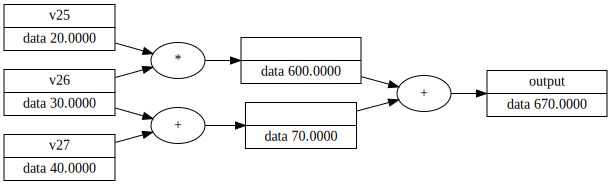

In [112]:
# Now, let's draw the expression graph.
get_expression_graph(v28)

In [113]:
v29 = Value_4(data=5, label="v29")
print(v29)
print("-" * 150)
v30 = Value_4(data=10, label="v30")
print(v30)
print("-" * 150)
v31 = Value_4(data=15, label="v31")
print(v31)
print("-" * 150)
v32 = Value_4(data=20, label="v32")
print(v32)
print("-" * 150)
v33 = Value_4(data=25, label="v33")
print(v33)
print("-" * 150)

data: 5, label: v29, operation: None, children: (None)
------------------------------------------------------------------------------------------------------------------------------------------------------
data: 10, label: v30, operation: None, children: (None)
------------------------------------------------------------------------------------------------------------------------------------------------------
data: 15, label: v31, operation: None, children: (None)
------------------------------------------------------------------------------------------------------------------------------------------------------
data: 20, label: v32, operation: None, children: (None)
------------------------------------------------------------------------------------------------------------------------------------------------------
data: 25, label: v33, operation: None, children: (None)
---------------------------------------------------------------------------------------------------------------------

In [116]:
# Let's build a slightly more complex expression:
# f(v29, v30, v31, v32, v33) = ((v29 * v30) + v31) * (v32 + v33 * ((v29 + v31) * v30))
# v34 = ((5 * 10) + 15) * (20 + 25 * ((5 + 15) * 10)) = (50 + 15) * (20 + 25 * 200) = 65 * (20 + 5000) = 65 * 5020 = 326300

v34 = ((v29 * v30) + v31) * (v32 + v33 * ((v29 + v31) * v30))
v34.label = "output"
print(v34)

data: 326300, label: output, operation: *, children: (65, 5020)


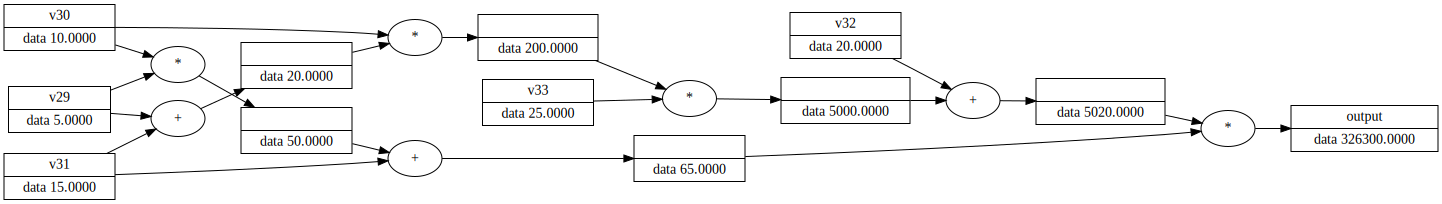

In [117]:
get_expression_graph(v34)